## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [6]:
customer_set = pd.read_csv('./Mall_Customers.csv')
customer_set_copy = customer_set.rename(columns={'Annual Income (k$)': 'Income', "Spending Score (1-100)" : "SpendingScore"})
customer_set_copy

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [12]:
print(f"Розмірність датасету {customer_set_copy.shape} ")
print(customer_set_copy.describe())
print("Наявність Nan по колонках")
print(customer_set_copy.isna().sum())

Розмірність датасету (200, 5) 
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000
Наявність Nan по колонках
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [14]:
customer_set_copy.drop(columns=['CustomerID'], inplace=True)
customer_set_copy

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

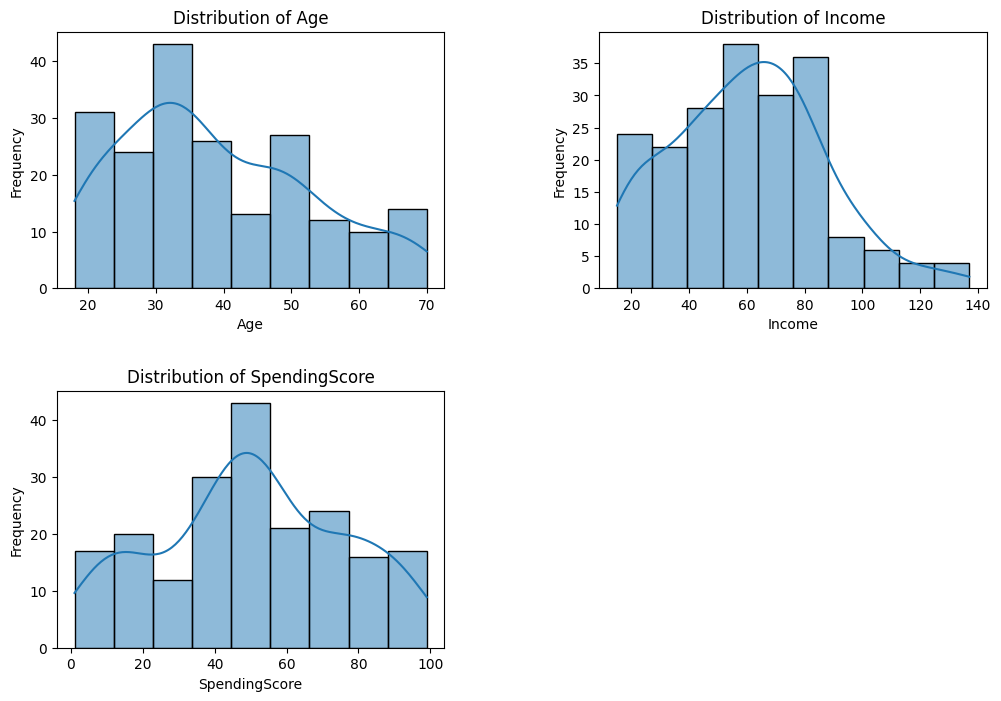

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(data=customer_set_copy, x='Age', kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')
ax[0, 0].set_xlabel('Age')
ax[0, 0].set_ylabel('Frequency')

sns.histplot(data=customer_set_copy, x='Income', kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Income')
ax[0, 1].set_xlabel('Income')
ax[0, 1].set_ylabel('Frequency')

sns.histplot(data=customer_set_copy, x='SpendingScore', kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of SpendingScore')
ax[1, 0].set_xlabel('SpendingScore')
ax[1, 0].set_ylabel('Frequency')

# Remove the empty subplot
fig.delaxes(ax[1, 1])
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

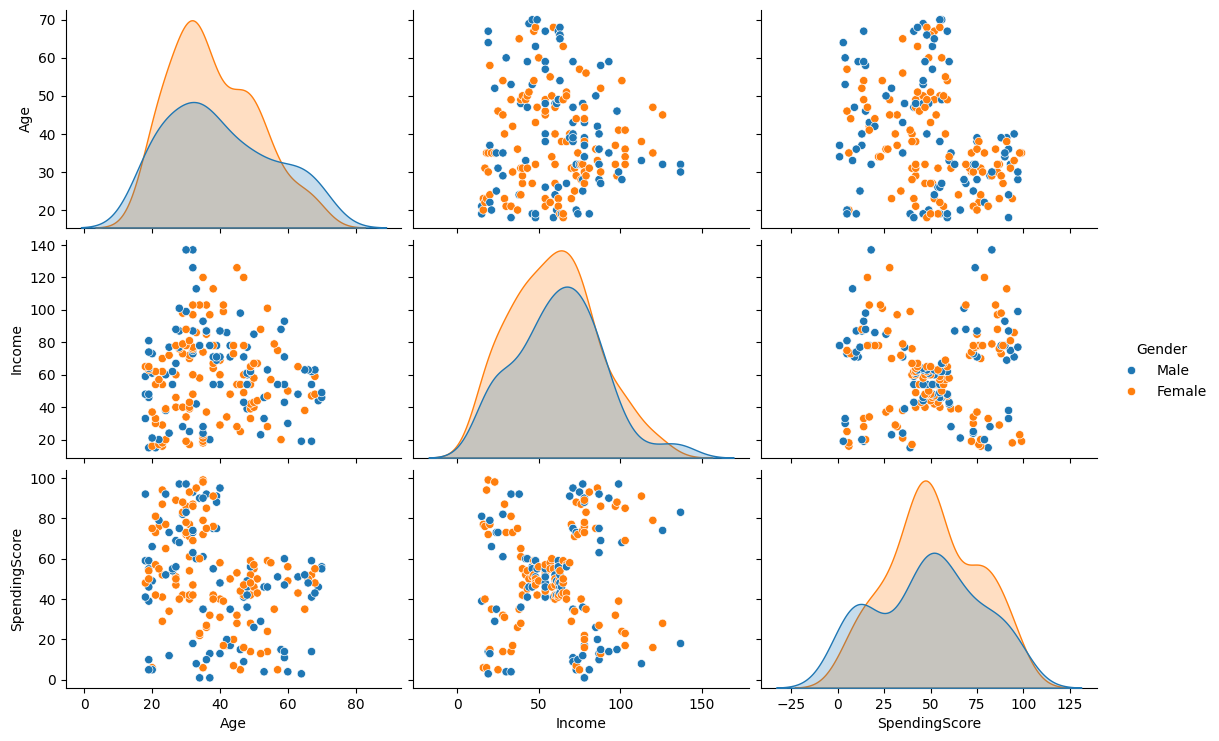

In [23]:
sns.pairplot(customer_set_copy, hue="Gender", aspect=1.5)

plt.show()

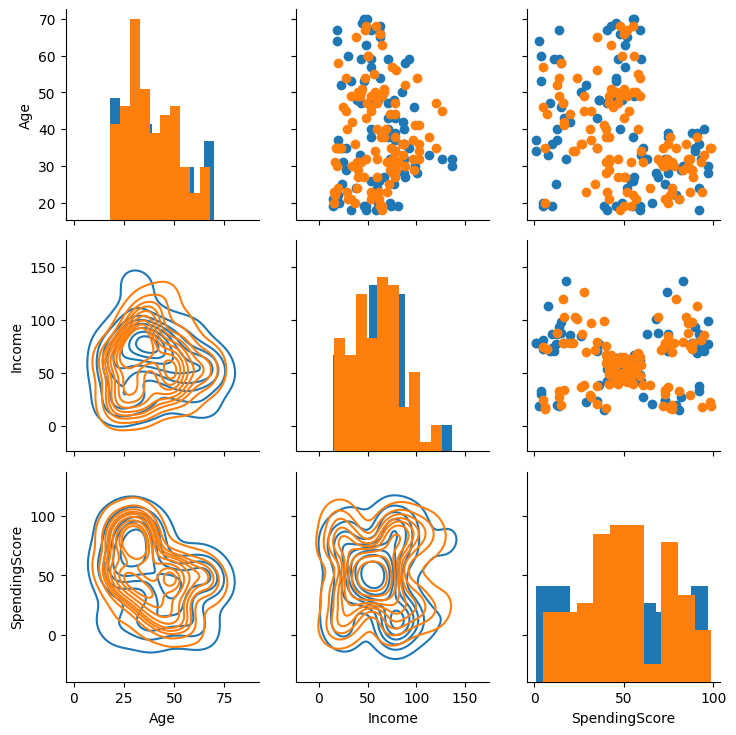

In [26]:
pair_grid = sns.PairGrid(data = customer_set_copy, hue = "Gender")

pair_grid.map_diag(plt.hist)
pair_grid.map_lower(sns.kdeplot)
pair_grid.map_upper(plt.scatter)


**Висновки з 1-4 завдання (детальні)**

1. Розмірність датасету становить 200 рядків, 5 колонок. (200x5).
Датасет не містить пропущених значень.
2. Змінну CustomerId ми видалили оскільки вона не впливає на аналіз вибірки.
3. Найбільше людей віком 35 років. Найбільше людей з доходом 60 та 80 k$. Кількість людей які витрачають найбільше коштів 50.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

<Axes: xlabel='Gender', ylabel='count'>

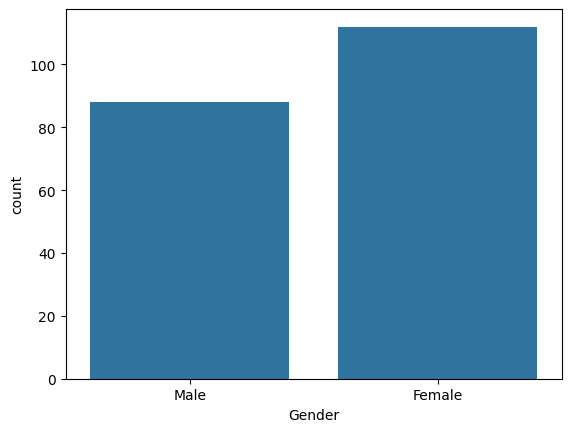

In [36]:
sns.countplot(x = 'Gender', data = customer_set_copy, )

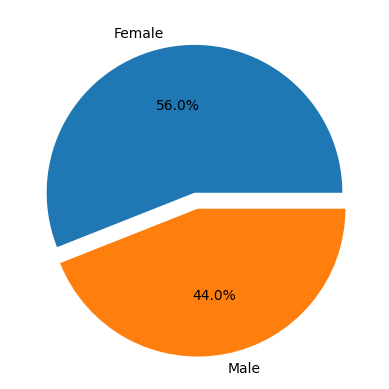

In [45]:
plt.pie(customer_set_copy.groupby('Gender').size(), labels = ['Female', 'Male'] , autopct = '%1.1f%%', explode = [0.01, 0.1])
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

Text(0, 0.5, 'Frequency')

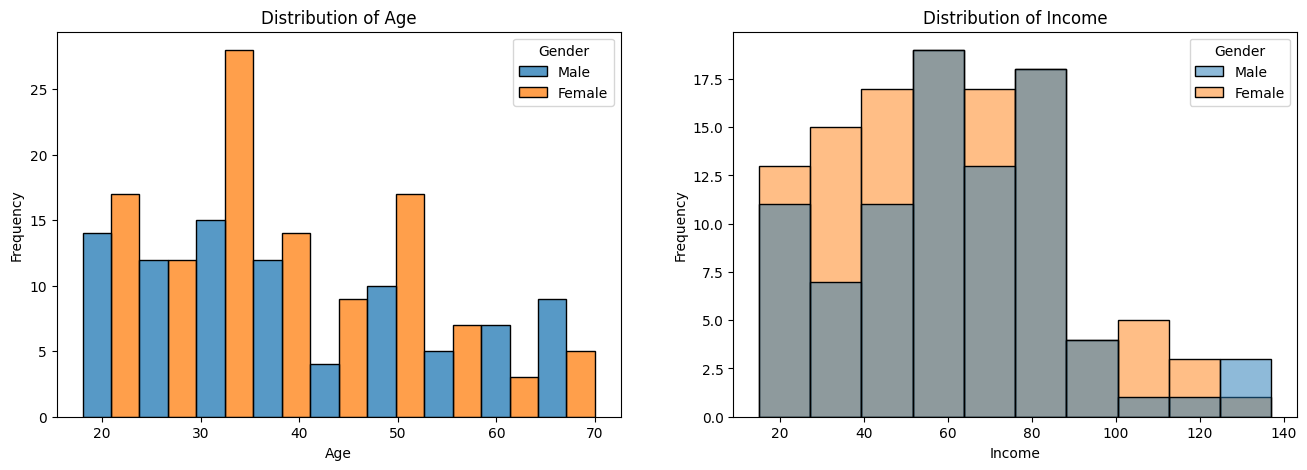

In [61]:


fig, ax = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=customer_set_copy, x='Age', hue='Gender', ax=ax[0], multiple = 'dodge')
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')

sns.histplot(data=customer_set_copy, x='Income', hue='Gender', ax=ax[1],  multiple = 'layer')
ax[1].set_title('Distribution of Income')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Frequency')



**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



<Axes: xlabel='SpendingScore', ylabel='Count'>

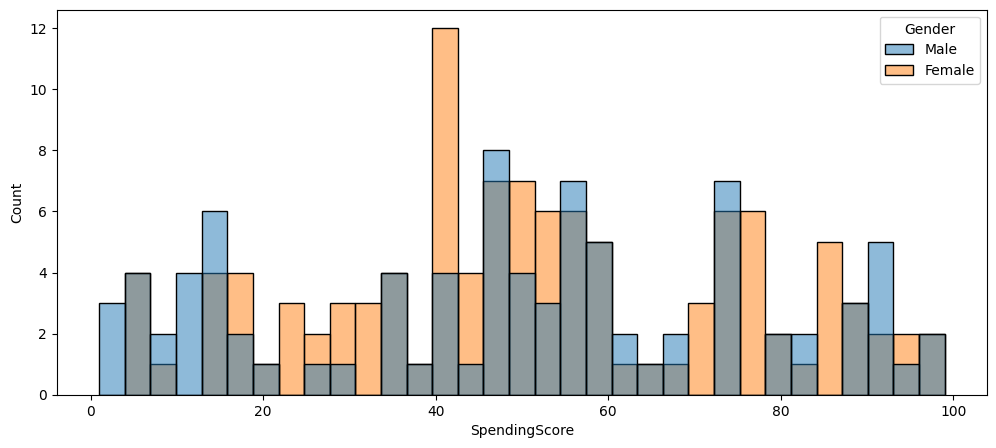

In [64]:
plt.figure(figsize = (12, 5))
sns.histplot(data=customer_set_copy, x = 'SpendingScore', hue = 'Gender', multiple = 'layer', binwidth = 3)


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

<Axes: xlabel='Gender', ylabel='SpendingScore'>

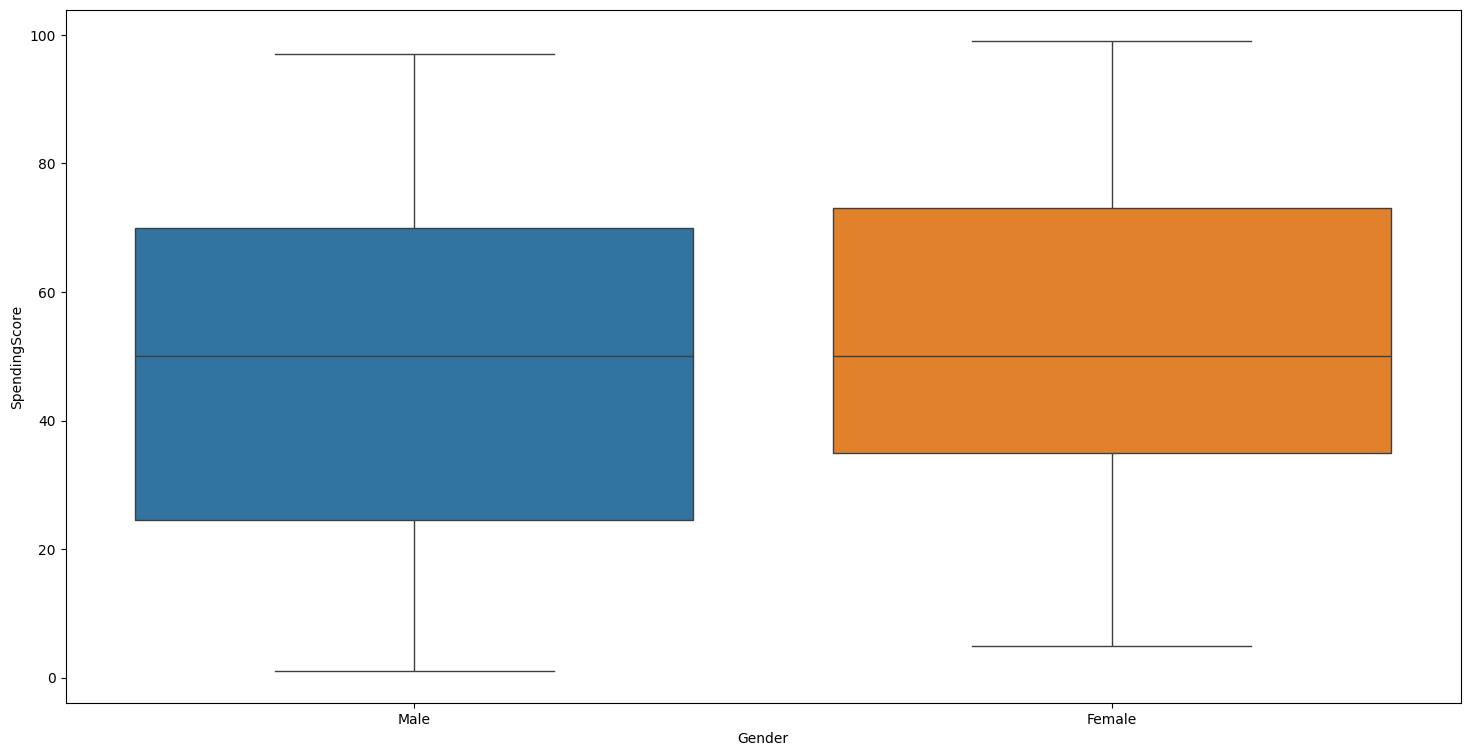

In [71]:
plt.figure(figsize = (18, 9))
sns.boxplot(data = customer_set_copy, x = 'Gender', y = 'SpendingScore', hue = "Gender")


**Висновки з завдання 5 - 8(детальні)**

5.   Жінок є більше ніж чоловіків а саме 56%, що становить 112 осіб.
6.  Жінки віком 35 років витрачають більше ніж чоловіки. Також жінки заробляють більше.
8. Жінки витрачають більше ніж чоловіки.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

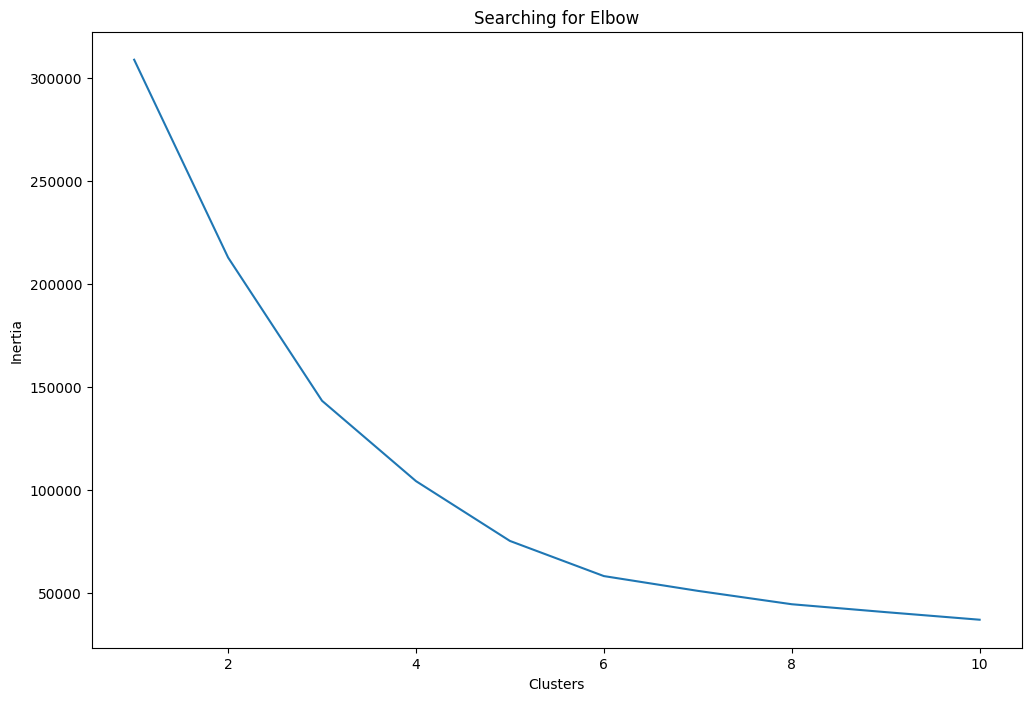

In [72]:
X = customer_set_copy.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

З  графіка можна побачити, що інерція швидко знижується від 1 до 2 кластерів і продовжує знижуватися, до 6 кластерів. Після 6 кластерів спад інерції стає ще більш плавним. Проте інерція швидко знижується до 4 кластерів. Після 4 кластерів вона знижується менше інтенсивно.
 Таким чином, оптимальна кількість кластерів для цього датасету ймовірно є 6 або 4.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

<Axes: xlabel='Income', ylabel='SpendingScore'>

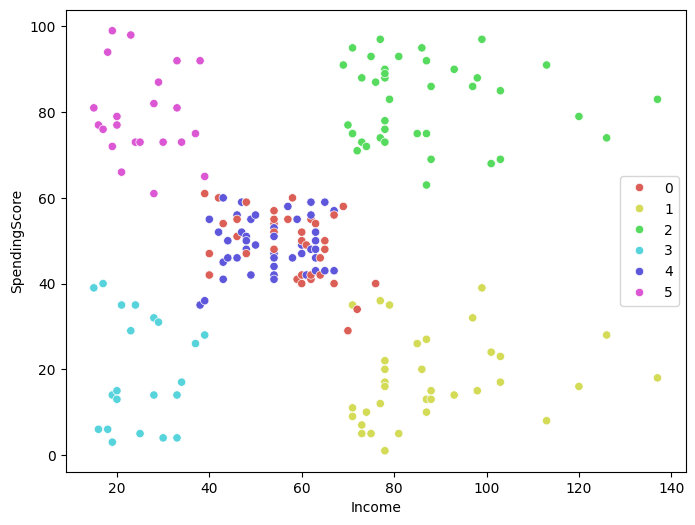

In [78]:
kmeans_6 = KMeans(n_clusters = 6).fit(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X['Income'], y = X['SpendingScore'], hue = kmeans_6.labels_, palette = sns.color_palette("hls", 6))

<Axes: xlabel='Income', ylabel='SpendingScore'>

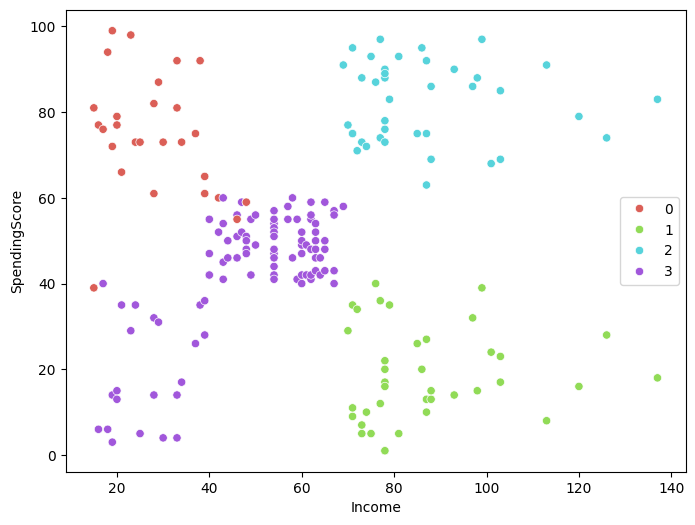

In [77]:
kmeans_4 = KMeans(n_clusters = 4).fit(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X['Income'], y = X['SpendingScore'], hue = kmeans_4.labels_, palette = sns.color_palette("hls", 4))


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [89]:
 px.scatter_3d(X, x='Age', y='SpendingScore', z='Income', color = kmeans.labels_)

**Висновки з завдання 10 - 11 (детальні)** 

За результатами аналізу кластерів можна сказати, що оптимальна кількість кластерів для нашої задачі - 4. Оскільки ми маємо обмежену кількість даних, обрання іншої кількості кластерів може призвести до неточностей у результаті аналізу.

Цей аналіз допомагає нам зрозуміти, скільки різних типів клієнтів має наш банк на основі їх доходів і витрат.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


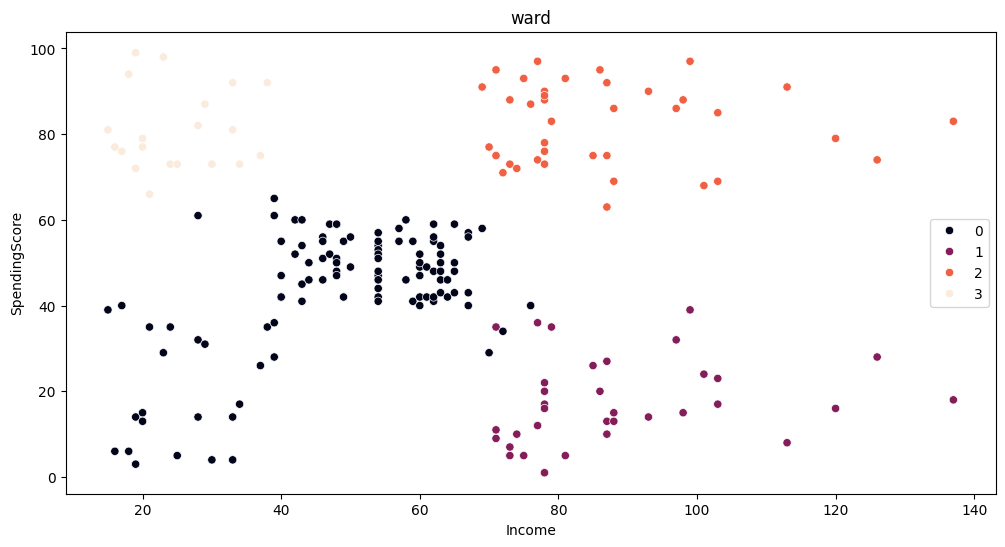

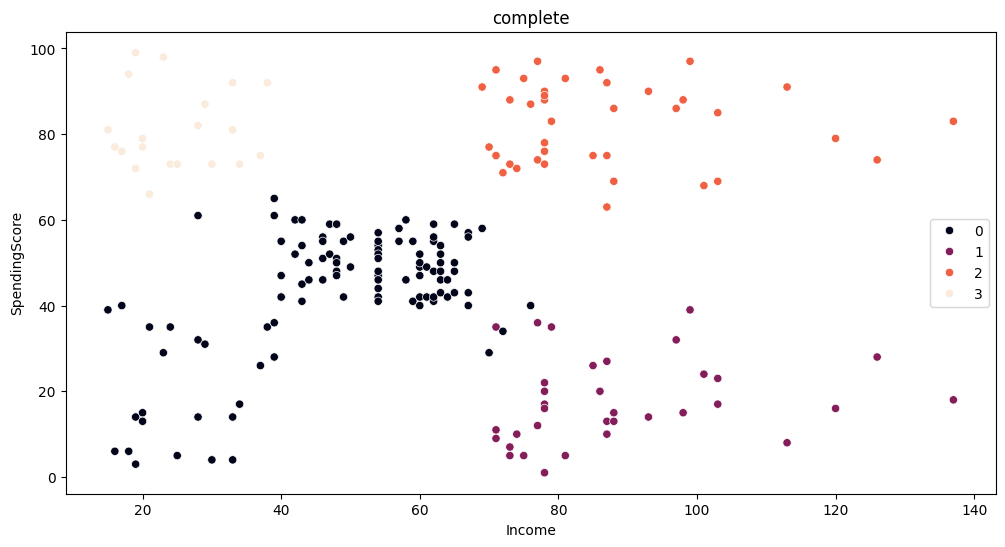

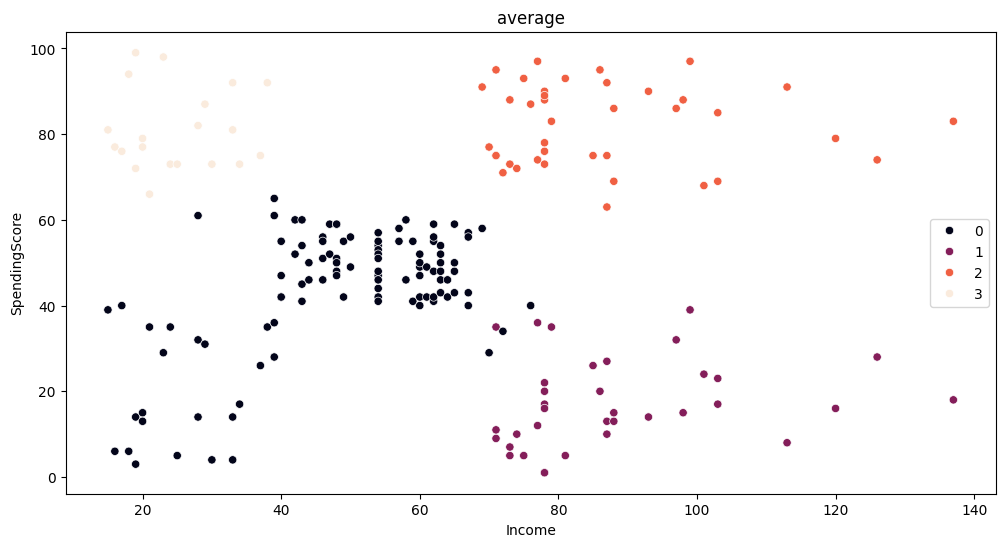

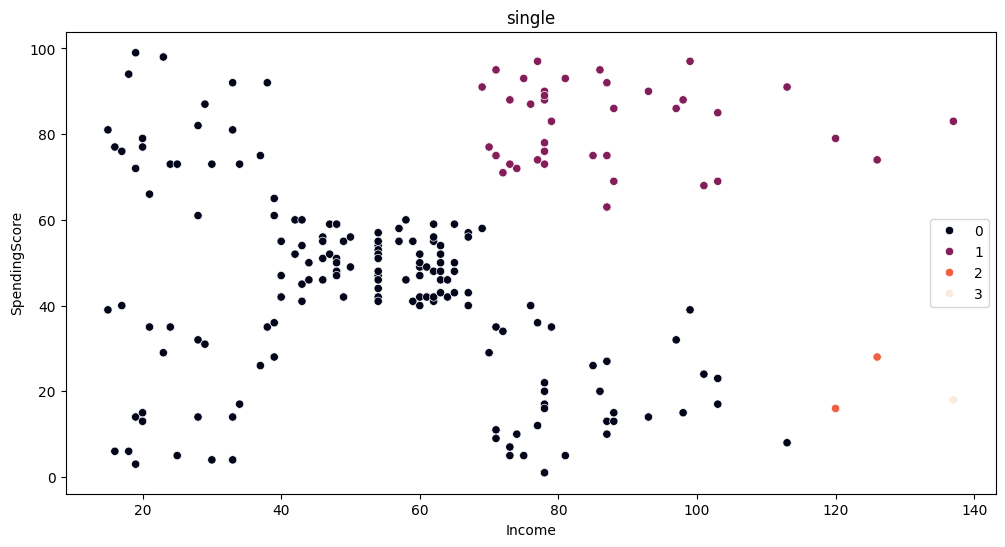

In [94]:
linkage_types = ['ward','complete','average','single']

for lg in linkage_types:
    algo_cluster = AgglomerativeClustering(n_clusters = 4,linkage=lg).fit(X)
    plt.figure(figsize =(12, 6))
    sns.scatterplot(x = 'Income', data=X, y='SpendingScore', 
               hue = algo_cluster.fit_predict(X),  palette ='rocket').set_title(lg)
    plt.show()

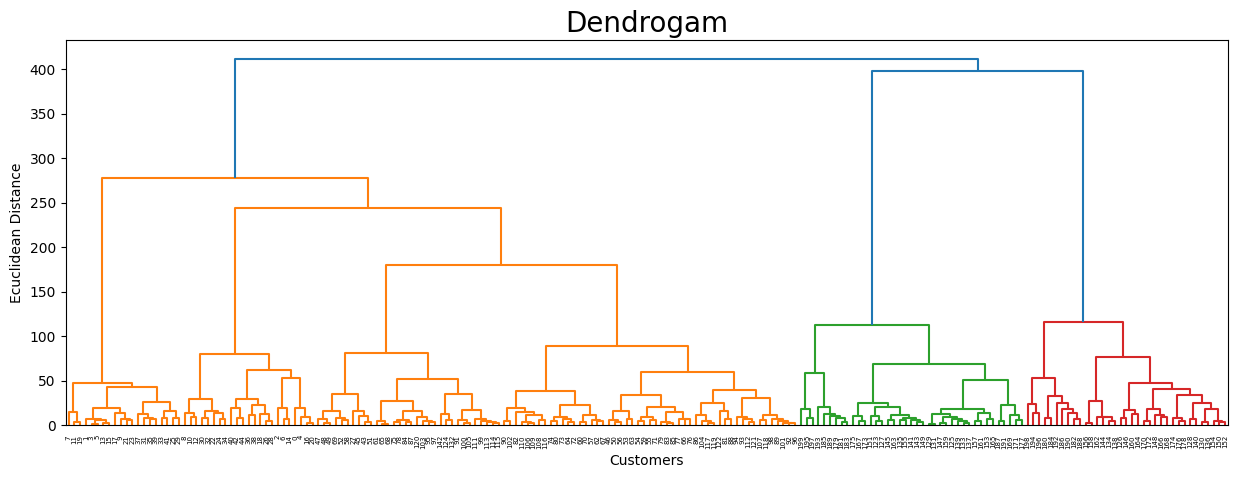

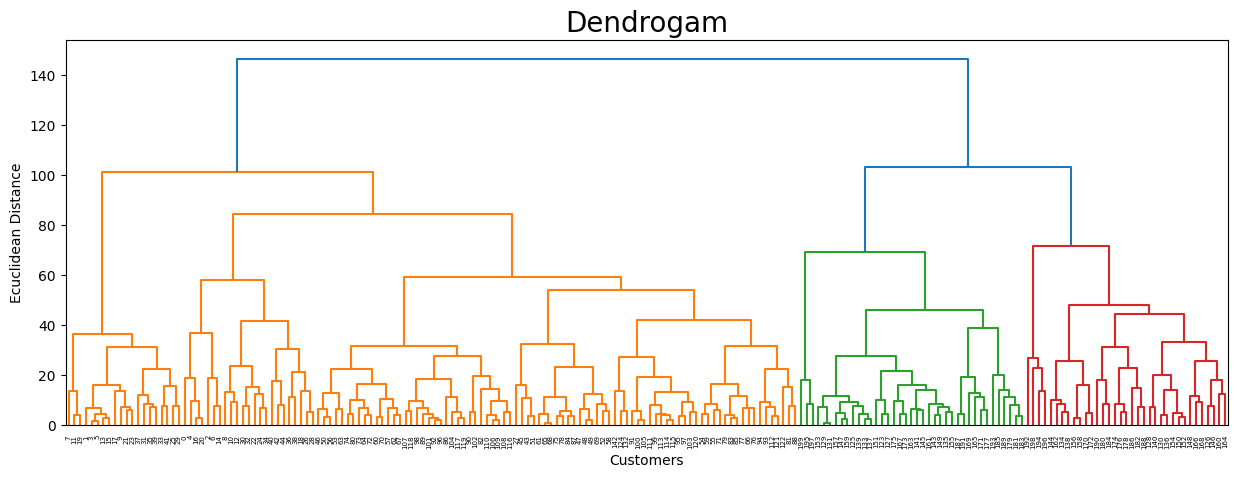

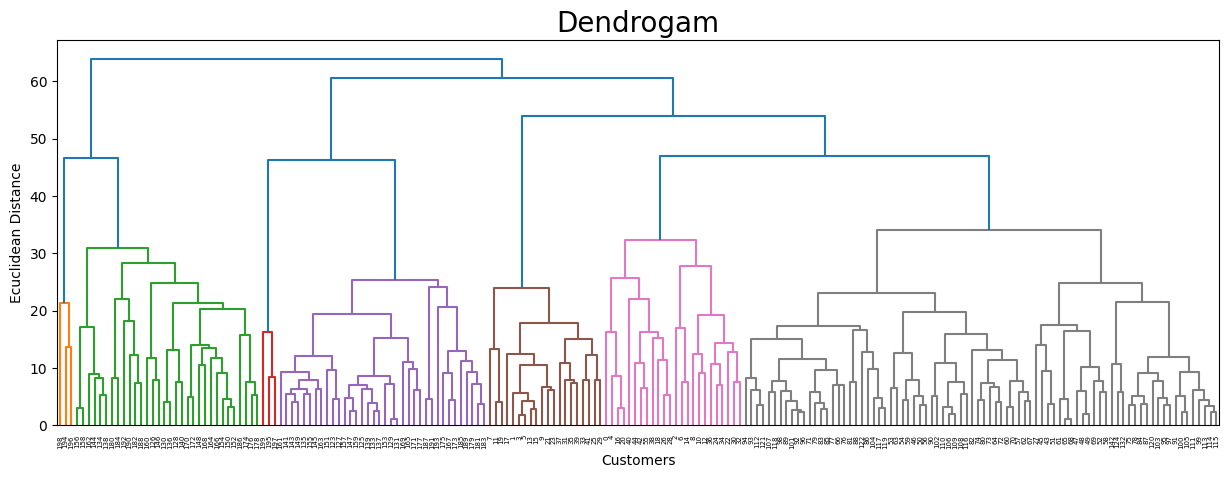

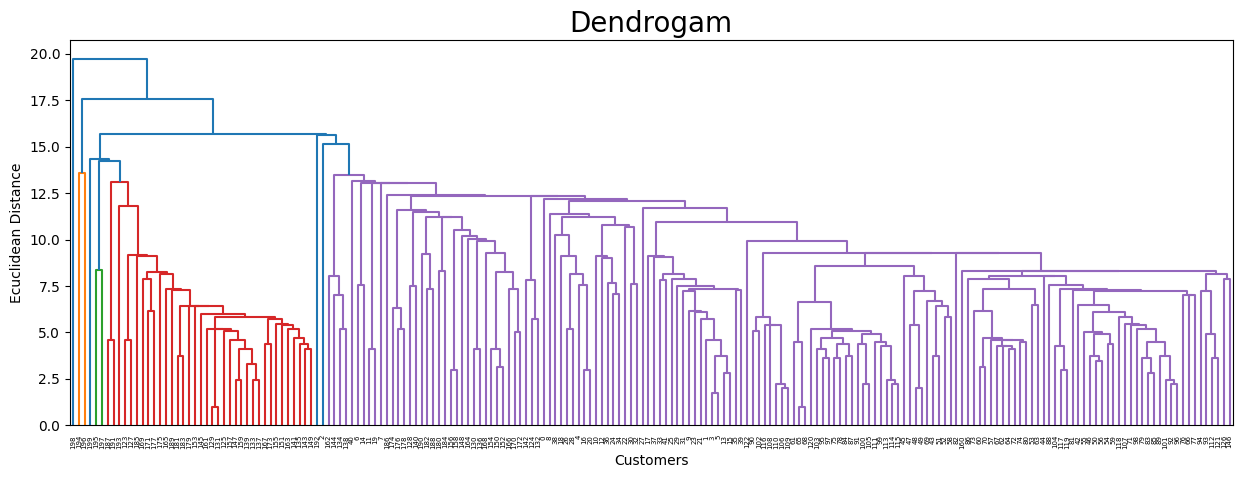

In [96]:


for method in linkage_types:
    plt.figure(figsize = (15, 5))
    dendrogram = hierarchy.dendrogram(hierarchy.linkage(X, method = method))
    plt.title('Dendrogam', fontsize = 20)
    plt.xlabel('Customers')
    plt.ylabel('Ecuclidean Distance')
    plt.show()

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

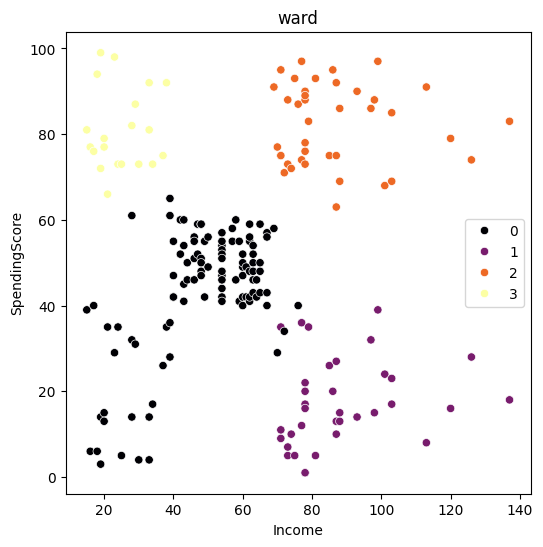

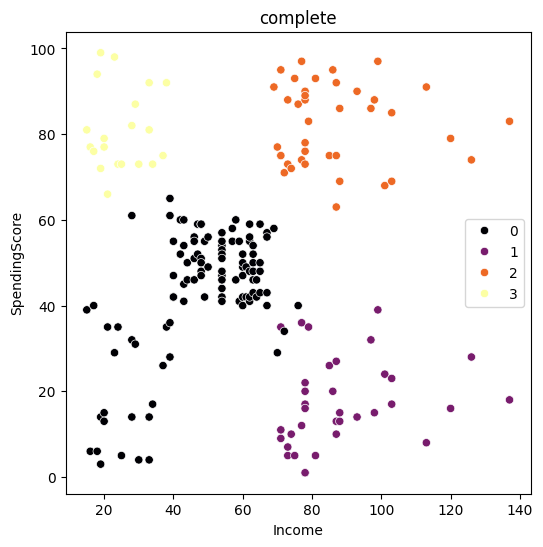

In [99]:
for lg in ['ward','complete']:
    algo_cluster = AgglomerativeClustering(n_clusters = 4,linkage=lg).fit(X)
    plt.figure(figsize =(6, 6))
    sns.scatterplot(x = 'Income', data=X,y='SpendingScore', 
               hue = algo_cluster.fit_predict(X),  palette ='inferno').set_title(lg)
    plt.show()

**Висновки з завдання 13 (детальні)**

Змінилися лише змінні у аналізі, оскільки ми використовували однаковий набір даних. Вибірка залишилася тією самою.
